In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


--- First 5 rows of Titanic data ---


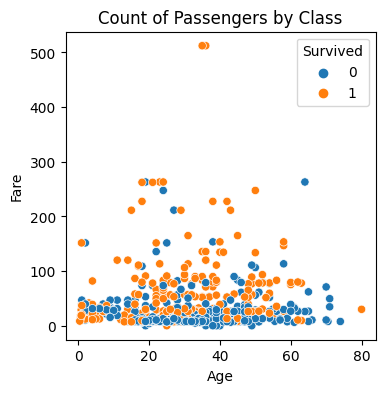

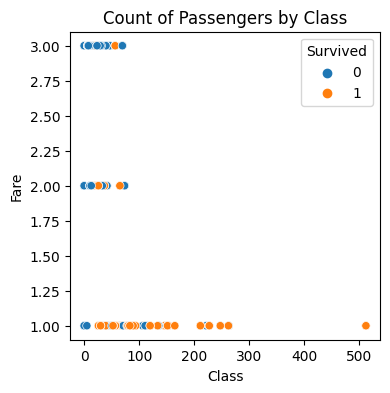

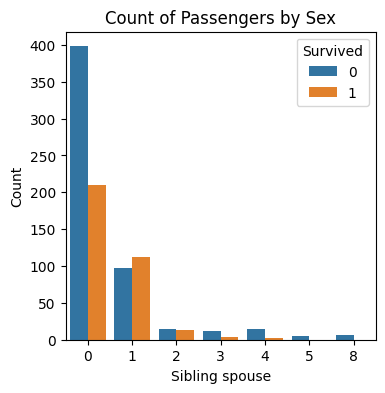

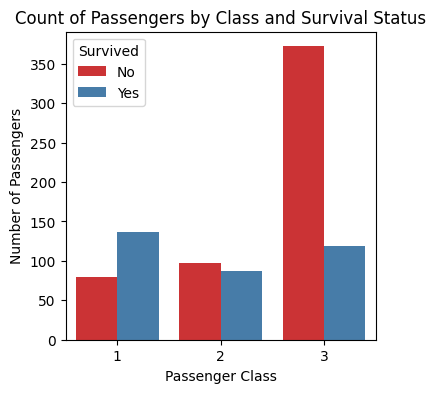

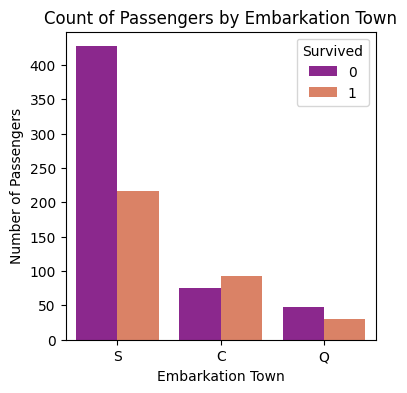

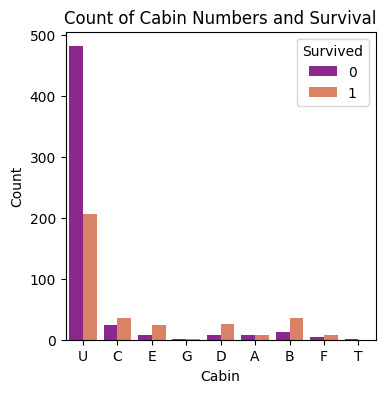

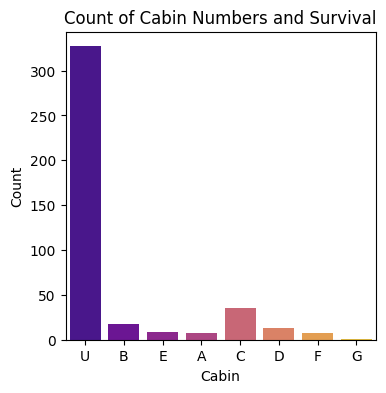

In [4]:

print("--- First 5 rows of Titanic data ---")
#print(titanic_df.head())
#fig, axes = plt.subplot()
# --- Basic sns.countplot examples ---

# 1. Count passengers by Pclass (vertical bars)
plt.figure(figsize=(4, 4))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Count of Passengers by Class')
plt.xlabel('Age')
plt.ylabel('Fare')
#plt.show()

plt.figure(figsize=(4, 4))
sns.scatterplot(x='Fare', y='Pclass', hue='Survived', data=train_data)
plt.title('Count of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Fare')

# 2. Count passengers by Sex (horizontal bars)
plt.figure(figsize=(4, 4))
sns.countplot(x='SibSp', hue='Survived', data=train_data) # Using a different color palette
plt.title('Count of Passengers by Sex')
plt.xlabel('Sibling spouse')
plt.ylabel('Count')
plt.show()

# 3. Count passengers by Pclass, separated by Survival status (using 'hue')
plt.figure(figsize=(4, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set1')
plt.title('Count of Passengers by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes']) # Custom legend labels
plt.show()

# 4. Count passengers by Embarkation Port, separated by Sex and ordered
plt.figure(figsize=(4, 4))
sns.countplot(x='Embarked', hue='Survived', data=train_data, # Explicit order for x-axis
              palette='plasma')
plt.title('Count of Passengers by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Number of Passengers')
plt.show()

train_data['Cabin'] = train_data['Cabin'].fillna('U')
train_data['Cabin'] = train_data['Cabin'].str.split().str[0].str[0]
test_data['Cabin'] = test_data['Cabin'].fillna('U')
test_data['Cabin'] = test_data['Cabin'].str.split().str[0].str[0]
plt.figure(figsize=(4, 4))
sns.countplot(x='Cabin', hue='Survived', data=train_data, # Explicit order for x-axis
              palette='plasma')
plt.title('Count of Cabin Numbers and Survival')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(4, 4))
sns.countplot(x='Cabin', data=test_data, # Explicit order for x-axis
              palette='plasma')
plt.title('Count of Cabin Numbers and Survival')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()



In [5]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
y = train_data["Survived"]

train_data["Age"] = train_data.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))
test_data["Age"] = test_data.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))

train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
test_data["Embarked"] = test_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].median())

features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Cabin", "Embarked", "Fare"]
print(test_data["Pclass"].isnull().sum())
print(test_data["Sex"].isnull().sum())
print(test_data["SibSp"].isnull().sum())
print(test_data["Parch"].isnull().sum())
print(test_data["Age"].isnull().sum())
print(test_data["Cabin"].isnull().sum())
print(test_data["Embarked"].isnull().sum())
print(test_data["Fare"].isnull().sum())
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
X = X.drop('Cabin_T', axis=1)
#print(X)
#print(X_test)
#model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1200,learning_rate=0.1,max_depth=6)
model = RandomForestClassifier(n_estimators=1800, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
print(output)
output.to_csv('submission.csv', index=False)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
